# NO LONGER NECESSARY - INCLUDED BOTH FUNDS AND ETFs FOR "ALL STRATEGIES"

In [31]:
import ffn

from fintools.Parameters import Parameters
from fintools.set_start_end import set_start_end
from fintools.get_yahoo_prices import get_yahoo_prices
from fintools.compute_weights_RS_DM import compute_weights_RS_DM
from fintools.endpoints import endpoints
from fintools.backtest import backtest
from fintools.monthly_return_table import monthly_return_table
from fintools.show_return_table import show_return_table

%matplotlib inline

portfolios = {
    'RS0001': { 'symbols': ['VCVSX','VWEHX','VFIIX','FGOVX','VWAHX'], 'prices': 'yahoo',
               'start': '1986-01-01', 'end': 'today',
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 2, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0002': {'symbols': ['MMHYX','FAGIX','VFIIX'], 'prices': 'yahoo', 
               'start': '1986-01-01', 'end': 'today',
               'rs_lookback': 3, 'risk_lookback': 2, 'n_top': 1, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0003': {'symbols': ['MMHYX','FAGIX','VFIIX'], 'prices': 'yahoo', 
               'start': '1986-01-01', 'end': 'today',
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 1, 'frequency': 'Q',
              'cash_proxy': 'CASHX', 'risk_free': 0},    
    'DM0001': {'symbols': ['VCVSX','VWINX','VWEHX','VGHCX','VUSTX','VFIIX','VWAHX','FGOVX','FFXSX'], 'prices': 'yahoo',
               'start': '1986-01-01', 'end': 'today',
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 3, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 'FFXSX'},
    'DM0002': {'symbols': ['VCVSX','VUSTX','VWEHX','VFIIX','VGHCX','FRESX'], 'prices': 'yahoo', 
               'start': '1986-01-01', 'end': 'today',
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 5, 'frequency': 'M',
              'cash_proxy': 'VFIIX', 'risk_free': 'FFXSX'},
    'PMA001': {'symbols': ['VCVSX', 'VFIIX'], 'prices': 'yahoo',
               'start': '1986-01-01', 'end': 'today',
               'risk_lookback': 3, 'frequency': 'M', 'allocations': [0.6, 0.4],
              'cash_proxy': 'VUSTX'},
    'PMA002': {'symbols': ['VCVSX', 'VWINX', 'VWEHX'], 'prices': 'yahoo',
               'start': '1986-01-01', 'end': 'today',
               'risk_lookback': 3, 'frequency': 'M', 'allocations': [0.6, 0.2, 0.2],
              'cash_proxy': 'VUSTX'},
    'PMA003': {'symbols': ['VCVSX', 'FAGIX', 'VGHCX'], 'prices': 'yahoo',
               'start': '1986-01-01', 'end': 'today',
               'risk_lookback': 2, 'frequency': 'M', 'allocations': [1./3., 1./3., 1./3.],
              'cash_proxy': 'VUSTX'}
    }

ImportError: ignored

Strategy : RS0001
FIRST BUY DATE = 1986-07-31 00:00:00



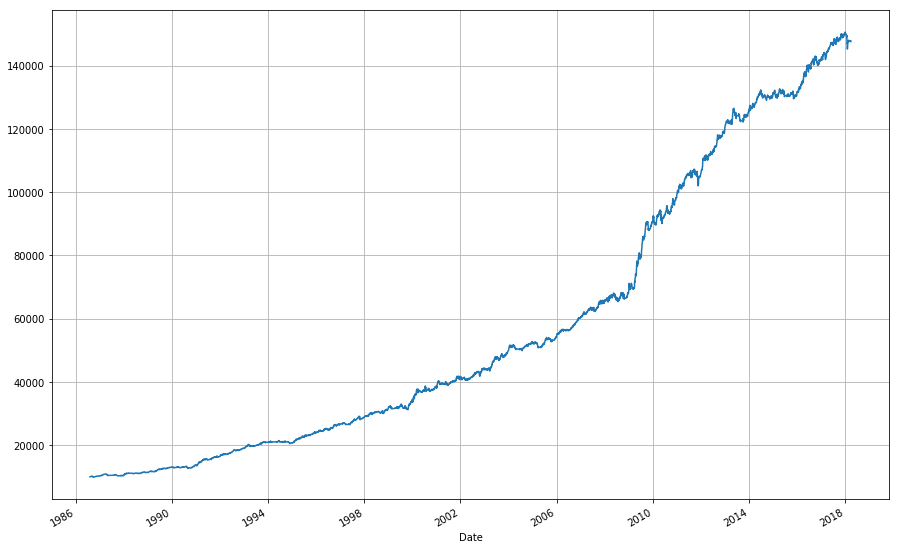

In [0]:
name = 'RS0001'

if 'PMA' in name :
    p_value, p_holdings, p_weights, p_prices =  compute_weights_PMA (name, portfolios[name])
else :
    p_value, p_holdings, p_weights, p_prices =  compute_weights_RS_DM (name, portfolios[name])
p_value.plot(figsize=(15, 10), grid=True)

In [0]:
ffn.calc_perf_stats(p_value).display()

Stats for None from 1986-07-31 00:00:00 - 2018-04-04 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
1376.13%               2  8.87%   -5.64%

Annualized Returns:
mtd     3m      6m      ytd     1y     3y     5y     10y    incep.
------  ------  ------  ------  -----  -----  -----  -----  --------
-0.15%  -1.90%  -0.53%  -1.73%  2.30%  3.91%  3.96%  8.21%  8.87%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  2.00     1.72       1.33
mean    8.59%    8.63%      8.87%
vol     4.30%    5.01%      6.67%
skew    -0.07    0.51       1.53
kurt    5.59     2.55       4.49
best    1.93%    8.13%      32.82%
worst   -2.74%   -3.83%     -1.73%

Drawdowns:
max     avg       # days
------  ------  --------
-5.64%  -0.72%     20.85

Misc:
---------------  ------
avg. up month    1.37%
avg. down month  -0.81%
up year %        93.75%
12m up %         98.

In [0]:
show_return_table(p_value)

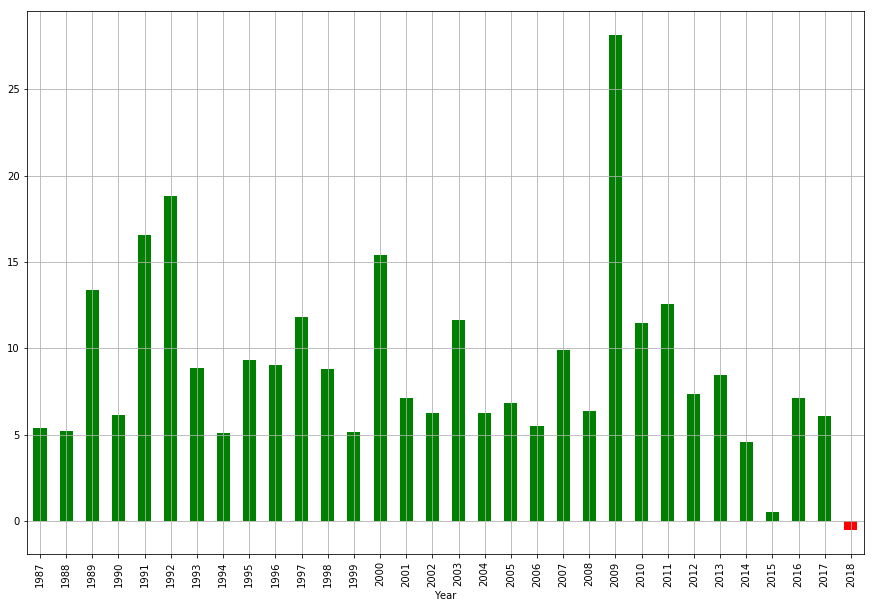

In [0]:
def show_annual_returns(strategy_value):
    df = monthly_return_table (strategy_value)
    frame = df['Annual Returns'].to_frame()
    frame['positive'] = df['Annual Returns'] >= 0
    frame['Annual Returns'].plot(figsize=(15,10),kind='bar',color=frame.positive.map({True: 'g', False: 'r'}), grid=True)
    
show_annual_returns(p_value)

# EACH STRATEGY SEPARATELY

Strategy : RS0001

FIRST BUY DATE = 1986-07-31 00:00:00




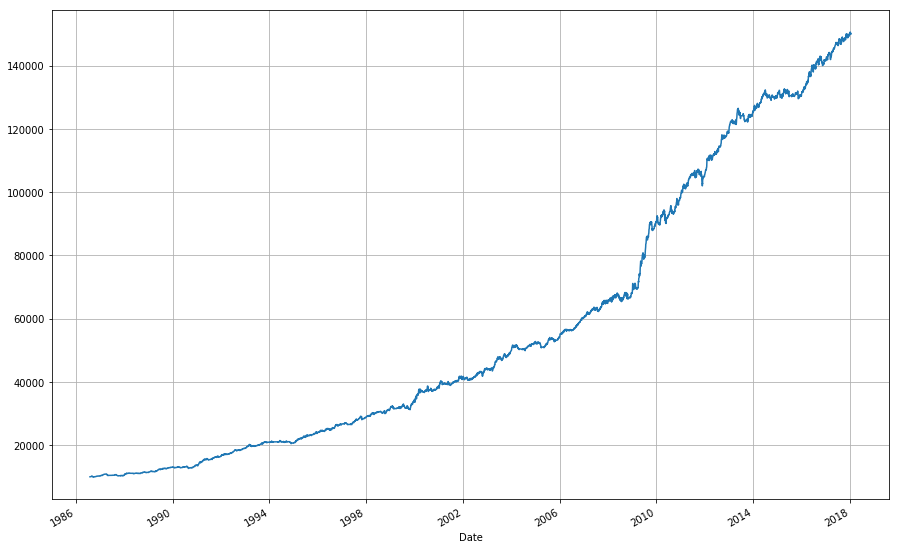

In [0]:
p_value1, p_holdings1, p_weights1, p_prices1 =  compute_weights_RS_DM ('RS0001', portfolios['RS0001'])
p_value1.plot(figsize=(15, 10), grid=True)

Strategy : RS0002

FIRST BUY DATE = 1986-03-31 00:00:00




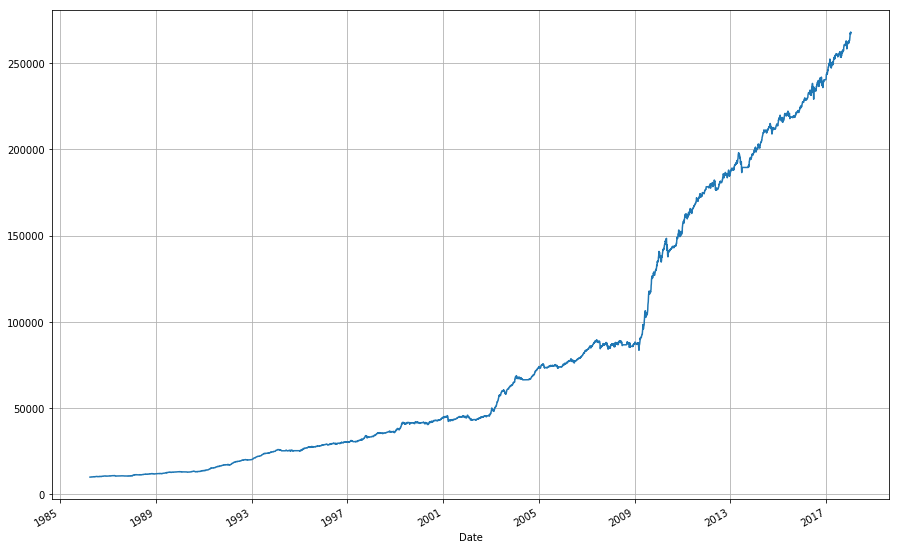

In [0]:
p_value2, p_holdings2, p_weights2, p_prices2 =  compute_weights_RS_DM ('RS0002', portfolios['RS0002'])
p_value2.plot(figsize=(15, 10), grid=True)

Strategy : RS0003

FIRST BUY DATE = 1986-03-31 00:00:00




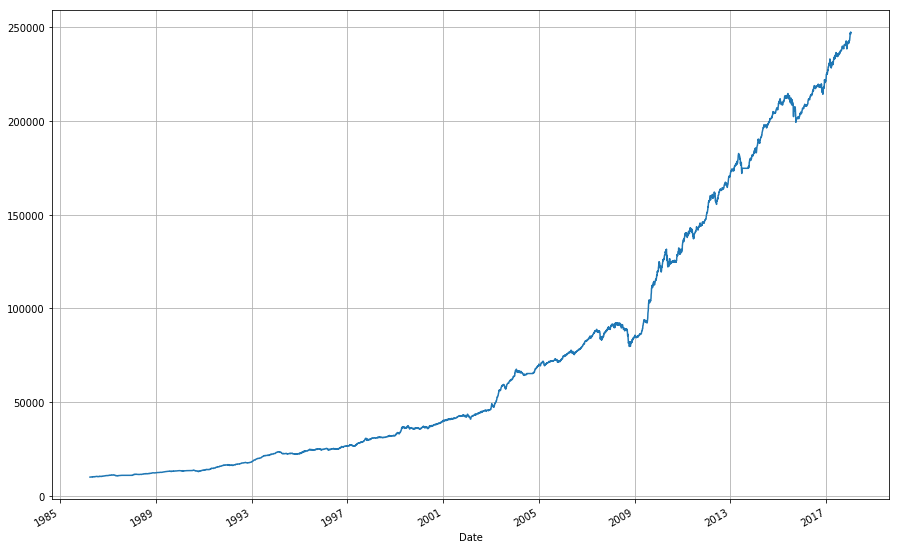

In [0]:
p_value3, p_holdings3, p_weights3, p_prices3 =  compute_weights_RS_DM ('RS0003', portfolios['RS0003'])
p_value3.plot(figsize=(15, 10), grid=True)

Strategy : DM0001

FIRST BUY DATE = 1986-12-31 00:00:00




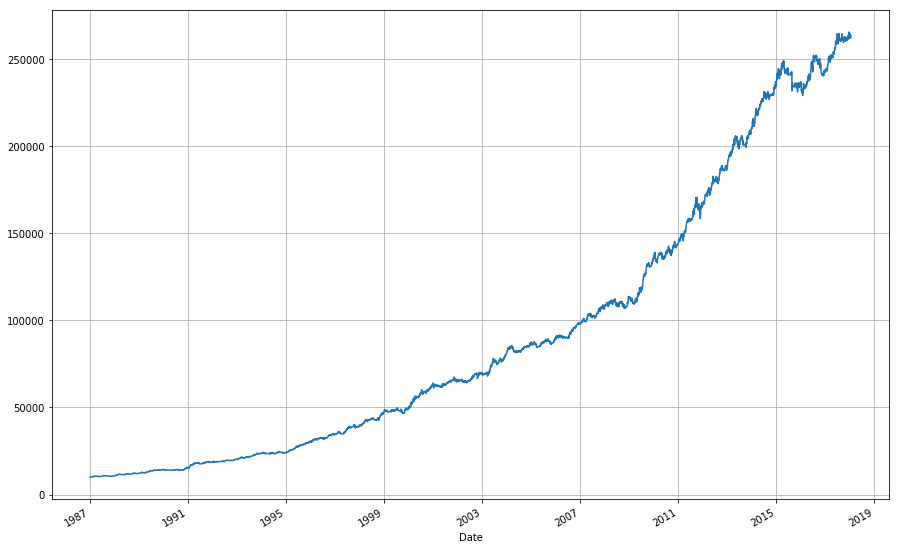

In [0]:
p_value4, p_holdings4, p_weights4, p_prices4 =  compute_weights_RS_DM ('DM0001', portfolios['DM0001'])
p_value4.plot(figsize=(15, 10), grid=True)

Strategy : DM0002

FIRST BUY DATE = 1986-12-31 00:00:00




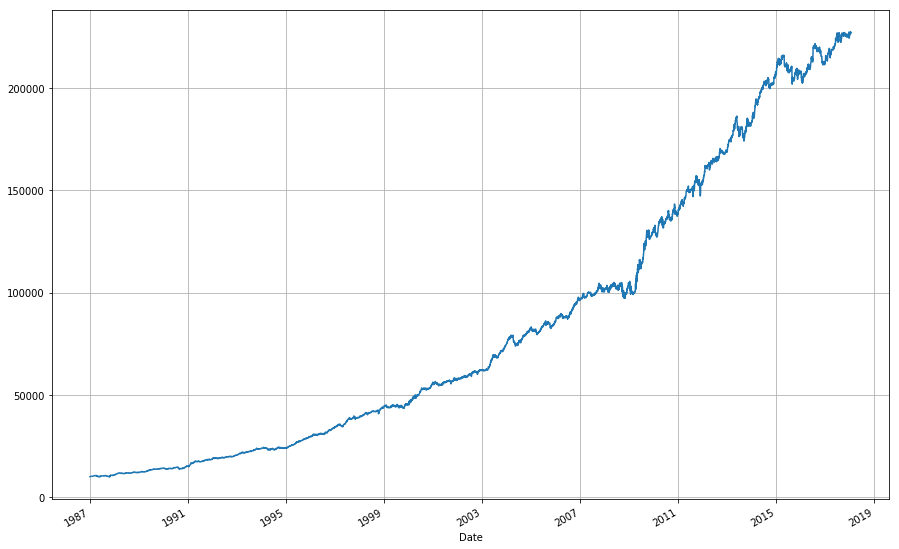

In [0]:
p_value5, p_holdings5, p_weights5, p_prices5 =  compute_weights_RS_DM ('DM0002', portfolios['DM0002'])
p_value5.plot(figsize=(15, 10), grid=True)

PMA001

FIRST BUY DATE = 1986-08-29 00:00:00




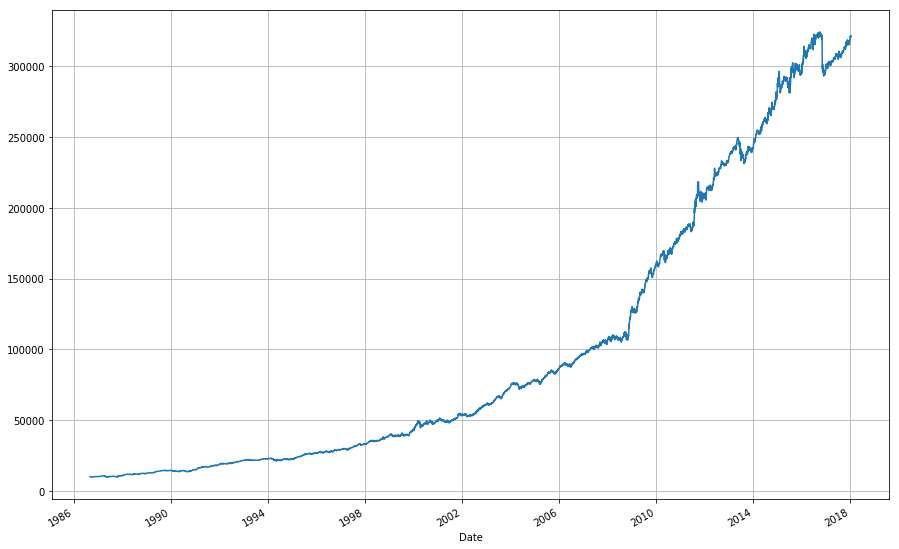

In [0]:
p_value6, p_holdings6, p_weights6, p_prices6 =  compute_weights_PMA ('PMA001', portfolios['PMA001'])
p_value6.plot(figsize=(15, 10), grid=True)

PMA002

FIRST BUY DATE = 1986-08-29 00:00:00




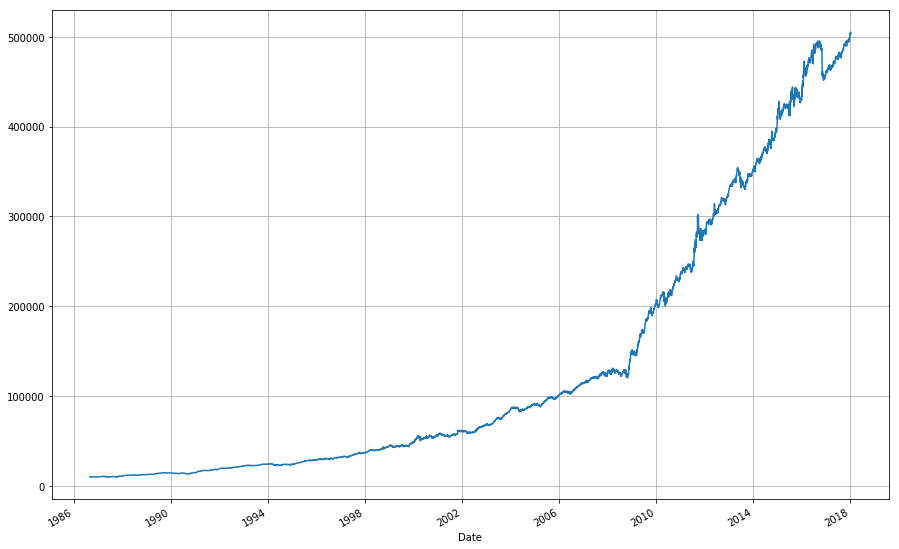

In [0]:
p_value7, p_holdings7, p_weights7, p_prices7 =  compute_weights_PMA ('PMA002', portfolios['PMA002'])
p_value7.plot(figsize=(15, 10), grid=True)

PMA003

FIRST BUY DATE = 1986-07-31 00:00:00




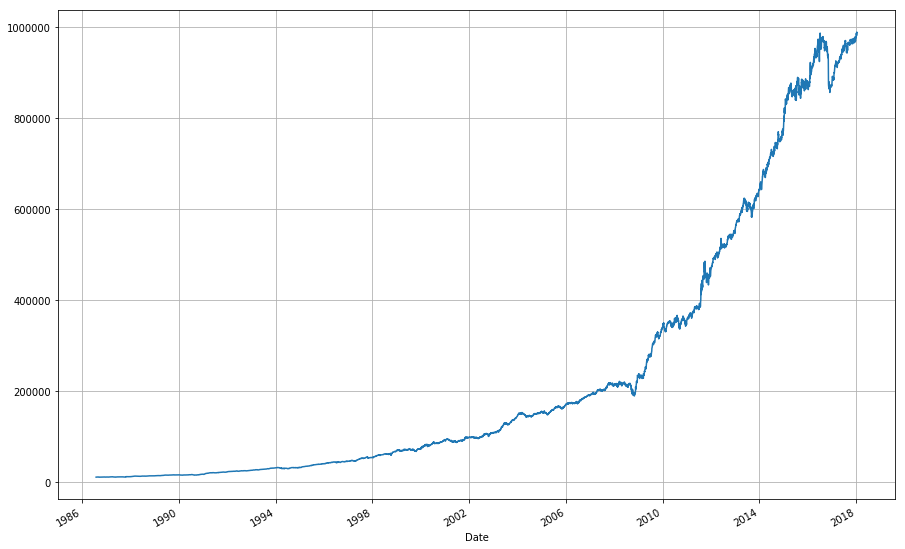

In [0]:
p_value8, p_holdings8, p_weights8, p_prices8 =  compute_weights_PMA ('PMA003', portfolios['PMA003'])
p_value8.plot(figsize=(15, 10), grid=True)